Generated dataset: (1000, 10) features, (1000, 1) targets


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None

🚀 Training ANN with Dropout for Regression...

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 13.2229 - mae: 2.5814 - val_loss: 17.3373 - val_mae: 2.6392
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.8476 - mae: 2.4103 - val_loss: 15.3184 - val_mae: 2.4648
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2181 - mae: 2.2370 - val_loss: 13.4628 - val_mae: 2.3279
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3441 - mae: 2.1458 - val_loss: 12.2534 - val_mae: 2.2299
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5498 - mae: 2.0586 - val_loss: 11.2227 - val_mae: 2.1704
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2869 - mae: 2.0389 - val_loss: 10.7162 - val_mae: 2.0875
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9600 - mae: 1.9085 - val_loss: 10.0186 - val_mae: 2.0019
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2750 - mae: 1.7640 - val_loss: 9.1002 - val_mae: 1.8920


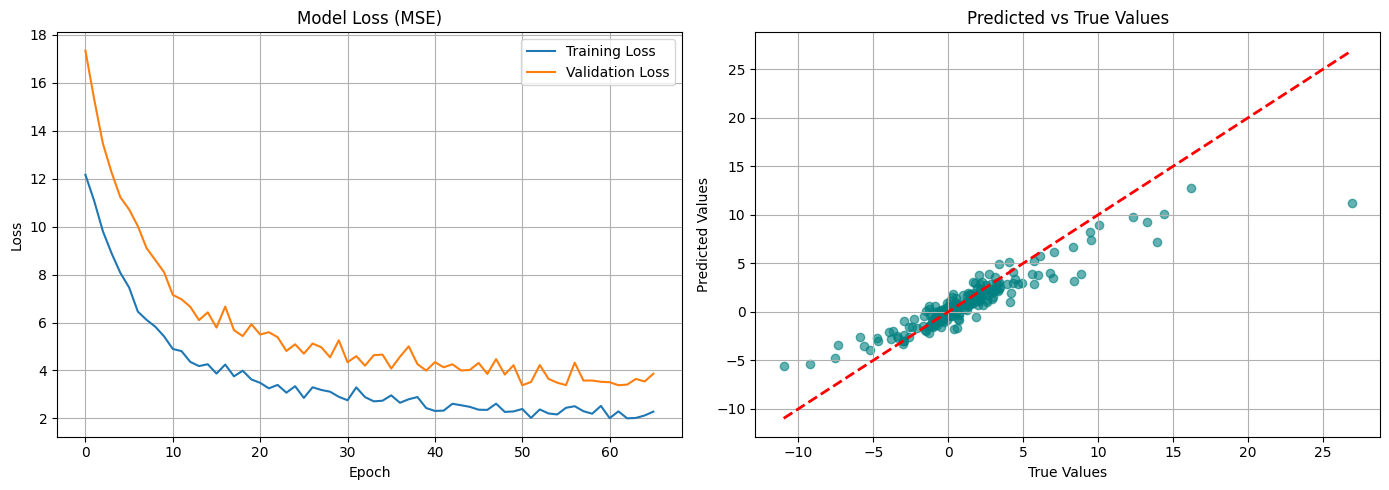

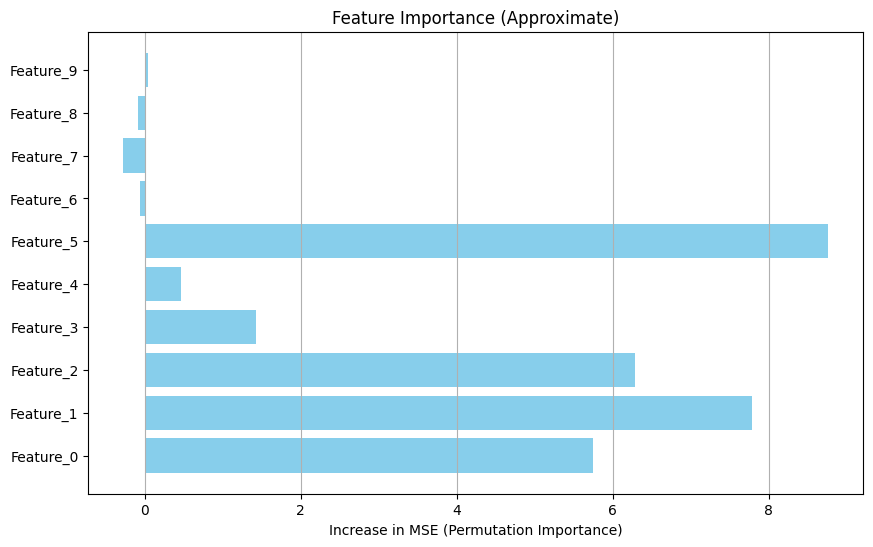


💡 Dropout helped stabilize training and reduce overfitting.
💡 Use higher dropout (e.g., 0.5) if overfitting persists.


In [1]:
# ann_dropout_regression.py
# Artificial Neural Network with Dropout for Regression on Random Data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 1. Generate Random Regression Dataset
# ----------------------------
n_samples = 1000
n_features = 10

# Random features
X = np.random.randn(n_samples, n_features)

# True relationship: nonlinear combination + noise
y = (
    X[:, 0]**2 +
    2 * X[:, 1] * X[:, 2] -
    X[:, 3] +
    np.sin(X[:, 4]) +
    0.5 * X[:, 5] ** 3 +
    np.random.randn(n_samples) * 0.5  # Add noise
)
y = y.reshape(-1, 1)  # Make it 2D

print(f"Generated dataset: {X.shape} features, {y.shape} targets")

# ----------------------------
# 2. Train-Test Split and Scaling
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------
# 3. Build ANN with Dropout Layers
# ----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),  # 30% of neurons "dropped" to prevent overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(1)  # No activation for regression (linear output)
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']  # Mean Absolute Error
)

print(model.summary())

# ----------------------------
# 4. Callbacks: Early Stopping
# ----------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# ----------------------------
# 5. Train the Model
# ----------------------------
EPOCHS = 200
BATCH_SIZE = 32

print("\n🚀 Training ANN with Dropout for Regression...\n")

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# ----------------------------
# 6. Evaluate Model
# ----------------------------
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Model Evaluation on Test Set:")
print(f"   Loss (MSE): {test_loss:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   MAE: {test_mae:.4f}")
print(f"   R² Score: {r2:.4f}")

# ----------------------------
# 7. Visualizations
# ----------------------------

# Plot 1: Training & Validation Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Predicted vs True Values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.grid(True)

plt.tight_layout()
plt.show()

# ----------------------------
# 8. Optional: Feature Importance via Permutation (Approximate)
# ----------------------------
def permutation_importance(model, X, y, metric=mean_squared_error):
    baseline = metric(y, model.predict(X, verbose=0))
    importances = []
    X_copy = X.copy()

    for i in range(X.shape[1]):
        saved_col = X_copy[:, i].copy()
        np.random.shuffle(X_copy[:, i])  # Shuffle one feature
        permuted_score = metric(y, model.predict(X_copy, verbose=0))
        importances.append(permuted_score - baseline)
        X_copy[:, i] = saved_col  # Restore

    return np.array(importances)

importances = permutation_importance(model, X_test, y_test)

plt.figure(figsize=(10, 6))
features = [f'Feature_{i}' for i in range(n_features)]
plt.barh(features, importances, color='skyblue')
plt.xlabel('Increase in MSE (Permutation Importance)')
plt.title('Feature Importance (Approximate)')
plt.grid(axis='x')
plt.show()

print("\n💡 Dropout helped stabilize training and reduce overfitting.")
print("💡 Use higher dropout (e.g., 0.5) if overfitting persists.")